In [1]:
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula as smf

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
def bin_opp(num):
    return 1 if num==0 else 0

In [32]:
data = pd.read_csv('data/character-predictions_pose.csv')
def clean(characters):
    characters = characters.loc[:,['name', 'male', 'house', 'isNoble', 'numDeadRelations', 'popularity', 'isAlive', 'culture']]
    characters = characters[~data.isnull().any(axis=1)]
    characters.reset_index(inplace = True, drop = True)
    #getting survival rates per culture
    culture_counts = pd.DataFrame(characters.culture.value_counts()).reset_index()
    survival_counts = pd.DataFrame(characters.groupby(['culture']).isAlive.value_counts())
    survival_counts.rename({'isAlive':'count_survived'}, axis='columns', inplace=True)
    survival_counts = pd.DataFrame(survival_counts.to_records())
    #for Qohor and Astapori, no one survived — this will be taken into account later and for now they will be dropped
    survival_counts = survival_counts[survival_counts['isAlive'] == 1]
    survival_counts.drop(columns=["isAlive"], inplace=True)
    culture_counts = culture_counts.rename(columns={'index':'culture', "culture" : "total"})
    survival_df = culture_counts.merge(survival_counts)
    survival_df['percent_survived'] = (survival_df['count_survived']/survival_df['total'])*100
    survival_df = survival_df.sort_values(by=['percent_survived'], ascending=False)
    display(survival_df[['culture', 'percent_survived']])

    #grouping cultures based on their survival rates
    characters.culture = characters.culture.replace(to_replace = ['Ibbenese', 'Asshai', 'Lhazarene', 'Summer Isles', 'First Men', 'Naathi', 'Norvoshi', 'Rhoynar', 'Crannogmen'], value = "all_survive")
    characters.culture = characters.culture.replace(to_replace = ['Ironborn', 'Ghiscari', 'Vale mountain clans', 'Dornish', 'Reach'], value = "most_survive")
    characters.culture = characters.culture.replace(to_replace = ['Dothraki', 'Stormlands', 'Rivermen', 'Braavosi', 'Northmen'], value = "many_survive")
    characters.culture = characters.culture.replace(to_replace = ['Qartheen', 'Myrish', 'Lysene', 'Valemen', 'Northern mountain clans', 'Tyroshi', 'Westeros'], value = "morethanhalf_survive")
    characters.culture = characters.culture.replace(to_replace = ['Westermen', 'Riverlands', 'Pentoshi', 'Free Folk', 'Sistermen', 'Meereen'], value = "half_survive")
    characters.culture = characters.culture.replace(to_replace = ['Riverlands', 'Lysene', 'Valyrian'], value = "few_survive")
    characters.culture = characters.culture.replace(to_replace = ['Wildling', 'Valyrian'], value = "few_survive")
    characters.culture = characters.culture.replace(to_replace = ['Astapori', 'Qohor'], value = "none_survive")



    culture_counts = pd.DataFrame(characters.culture.value_counts()).reset_index()
    culture_counts = culture_counts.rename(columns={'index':'culture', "culture" : "count"})
    
    for house in characters.house:

        percent_alive = characters[characters.house == house].isAlive.mean()

        characters.loc[characters.house == house, 'house_alive'] = percent_alive

 

    # Bin house_alive into 5 bins

    binned_house_alive = pd.qcut(characters['house_alive'],10,retbins=True, duplicates = 'drop')

    bins = binned_house_alive[1]

    characters['house_alive_binned'] = pd.cut(characters['house_alive'],bins = bins)

    dum = pd.get_dummies(characters.house_alive_binned,drop_first = True)

    dum.columns = ['house_alive'+str(x) for x in range(1,len(bins)-1)]

    characters = pd.concat([characters,dum], axis = 1)

 

    age_data = characters.groupby('house_alive_binned')['isAlive'].agg([('percent','mean'),('nobs','count')]).reset_index(drop=False)

    # sns.lineplot(x = age_data.index, y= age_data['percent'])

    # plt.xlabel('house_bin')
    
    return characters
characters = clean(data)

ValueError: 'names', 'formats', 'offsets', and 'titles' dict entries must have the same length

In [18]:
# clean cultures 

culture_counts = pd.DataFrame(characters.culture.value_counts())

#combining culture names that mean the same thing 
characters.culture = characters.culture.replace(to_replace = "northmen", value = "Northmen")
characters.culture = characters.culture.replace(to_replace = "ironborn", value = "Ironborn")
characters.culture = characters.culture.replace(to_replace = "Ironmen", value = "Ironborn")
characters.culture = characters.culture.replace(to_replace = "Asshai'i", value = "Asshai")
characters.culture = characters.culture.replace(to_replace = "Free folk", value = "Free Folk")
characters.culture = characters.culture.replace(to_replace = "free folk", value = "Free Folk")
characters.culture = characters.culture.replace(to_replace = "Summer Islands", value = "Summer Isles")
characters.culture = characters.culture.replace(to_replace = "Summer Islander", value = "Summer Isles")
characters.culture = characters.culture.replace(to_replace = "westermen", value = "Westermen")
characters.culture = characters.culture.replace(to_replace = "Westerman", value = "Westermen")
characters.culture = characters.culture.replace(to_replace = "Westerlands", value = "Westermen")
characters.culture = characters.culture.replace(to_replace = "Vale", value = "Valemen")
characters.culture = characters.culture.replace(to_replace = "Lhazareen", value = "Lhazarene")
characters.culture = characters.culture.replace(to_replace = "The Reach", value = "Reach")
characters.culture = characters.culture.replace(to_replace = "Reachmen", value = "Reach")
characters.culture = characters.culture.replace(to_replace = "Qarth", value = "Qartheen")
characters.culture = characters.culture.replace(to_replace = "Lyseni", value = "Lysene")
characters.culture = characters.culture.replace(to_replace = "Stormlander", value = "Stormlands")
characters.culture = characters.culture.replace(to_replace = "Meereenese", value = "Meereen")
characters.culture = characters.culture.replace(to_replace = "Astapor", value = "Astapori")
characters.culture = characters.culture.replace(to_replace = "Norvos", value = "Norvoshi")
characters.culture = characters.culture.replace(to_replace = "Wildlings", value = "Wildling")
characters.culture = characters.culture.replace(to_replace = "Andals", value = "Andal")
characters.culture = characters.culture.replace(to_replace = "Braavos", value = "Braavosi")
characters.culture = characters.culture.replace(to_replace = "Dorne", value = "Dornish")
characters.culture = characters.culture.replace(to_replace = "Dornishmen", value = "Dornish")
characters.culture = characters.culture.replace(to_replace = "Ghiscaricari", value = "Ghiscari")

In [19]:
#getting survival rates per culture 
culture_counts = pd.DataFrame(characters.culture.value_counts()).reset_index()
survival_counts = pd.DataFrame(characters.groupby(['culture']).isAlive.value_counts())
survival_counts.rename({'isAlive':'count_survived'}, axis='columns', inplace=True)
survival_counts = pd.DataFrame(survival_counts.to_records())
#for lysene and rivermen, no one survived — this will be taken into account later and for now they will be dropped
survival_counts = survival_counts[survival_counts['isAlive'] == 1] 
survival_counts.drop(columns=["isAlive"], inplace=True)
culture_counts = culture_counts.rename(columns={'index':'culture', "culture" : "total"})
survival_df = culture_counts.merge(survival_counts)
survival_df['percent_survived'] = (survival_df['count_survived']/survival_df['total'])*100
survival_df = survival_df.sort_values(by=['percent_survived'], ascending=False)
display(survival_df)

,culture,total,count_survived,percent_survived
33,Ibbenese,1,1,100.000000
29,Asshai,1,1,100.000000
32,Lhazarene,1,1,100.000000
16,Summer Isles,4,4,100.000000
31,First Men,1,1,100.000000
27,Naathi,1,1,100.000000
30,Norvoshi,1,1,100.000000
28,Rhoynar,1,1,100.000000
18,Crannogmen,4,4,100.000000
8,Ghiscari,16,14,87.500000


In [20]:
#grouping cultures based on their survival rates
characters.culture = characters.culture.replace(to_replace = ['Crannogmen', 'Reach', 'Norvoshi', 'Naathi', 'Vale mountain clans', 'Braavosi', 'Dorne', 'Dothraki', 'Myrish', 'Dornish'], value = "all_survive")
characters.culture = characters.culture.replace(to_replace = ['Ironborn', 'Westeros', 'Dornishmen', 'Rivermen', 'Northmen'], value = "most_survive")
characters.culture = characters.culture.replace(to_replace = ['Westermen', 'Stormlands', 'Ghiscari', 'Wildling', 'Valemen'], value = "half_survive")
characters.culture = characters.culture.replace(to_replace = ['Riverlands', 'Lysene', 'Valyrian'], value = "few_survive")
culture_counts = pd.DataFrame(characters.culture.value_counts()).reset_index()
culture_counts = culture_counts.rename(columns={'index':'culture', "culture" : "count"})
display(culture_counts)

,culture,count
0,most_survive,253
1,all_survive,95
2,half_survive,64
3,few_survive,46
4,Northern mountain clans,5
5,Tyroshi,5
6,Summer Isles,4
7,Meereen,4
8,Qartheen,3
9,Pentoshi,2


In [21]:
clean_data = characters

In [22]:
def test_person(name, formula, data = clean_data):
    train = data.loc[data['name'] != name]
    person = data.loc[data['name'] == name]
    model = sm.logit(formula = formula, data=data).fit()
    prediction = model.predict(person)
    return prediction.values[0], person["isAlive"].values[0]

In [23]:
def test(formula, num_examples=50, loss_func=None, cutoff=.3):
    accurate_counter = 0
    mat_state = [[0,0],[0,0]]
    for index, row in clean_data.iterrows():
        p, act = test_person(row['name'], formula, data = clean_data)
        if p + cutoff >= 1:
            bin_p = 1
        else:
            bin_p = 0
        mat_state[bin_opp(bin_p)][bin_opp(act)] += 1
        if index >= num_examples:
            break
    if loss_func is None:
        return mat_state[0][0]+mat_state[1][1], mat_state
    else:
        return loss_func(accurate_counter), mat_state

In [24]:
def predictions(formula, data = clean_data):
    return data.apply(lambda x: test_person(x["name"], formula=formula, data=data)[0], axis=1)

In [25]:
test("isAlive~culture", num_examples=len(clean_data))

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35

C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu


         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35

C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu


         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096

C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu


         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096

C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu


         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

(353, [[281, 76], [64, 72]])

In [28]:
test("isAlive~house", num_examples=len(clean_data))

         Current function value: 0.390775
         Iterations: 35


LinAlgError: Singular matrix

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096

C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu


         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35

C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu


         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35
         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximu

         Current function value: 0.526096
         Iterations: 35


C:\Users\ctawa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


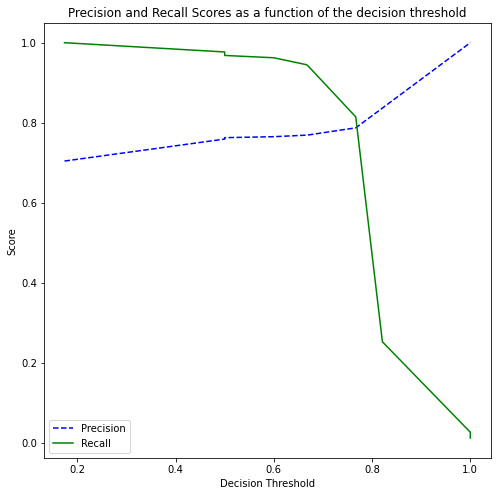

In [26]:
from sklearn.metrics import precision_recall_curve
y = clean_data.isAlive
ypred = predictions("isAlive~culture")
p, r, thresholds = precision_recall_curve(y, ypred)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)